# **Data Cleaning NoteBook**

## Objectives

* Evaluate missing data
* Clean data

## Inputs

* outputs/datasets/collection/house_price_records.csv 

## Outputs

* Generate cleaned Train and test sets, both saved under outputs/datasets/cleaned 

## Conclusions

* Data Cleaning Pipeline
* Drop Variables: ['EnclosedPorch', 'WoodDeckSF']

## Additional Comments

* Variables  ['EnclosedPorch', 'WoodDeckSF'] wont be relevant for this prediction tool because of the high porcentage of missing data. Therefore their correlations with the price are uncertain.


---

# Change working directory

In [1]:
import numpy
import os

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues/jupyter_notebooks'

Change the working directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues'

# House prices records

## Load Collected data

In [5]:
import pandas as pd
df_house_price_records = "outputs/datasets/collection/house_price_records.csv"
df_house_price_records = pd.read_csv(df_house_price_records)
df_house_price_records.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


## Data Exploration

In [6]:
df_house_price_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

In [7]:
df_missing_data = df_house_price_records.columns[df_house_price_records.isna().sum() > 0].to_list()
df_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

In [8]:
df_house_price_records[df_missing_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2ndFlrSF       1374 non-null   float64
 1   BedroomAbvGr   1361 non-null   float64
 2   BsmtFinType1   1346 non-null   object 
 3   EnclosedPorch  136 non-null    float64
 4   GarageFinish   1298 non-null   object 
 5   GarageYrBlt    1379 non-null   float64
 6   LotFrontage    1201 non-null   float64
 7   MasVnrArea     1452 non-null   float64
 8   WoodDeckSF     155 non-null    float64
dtypes: float64(7), object(2)
memory usage: 102.8+ KB


In [9]:
from ydata_profiling import ProfileReport
if df_missing_data:
    profile = ProfileReport(df=df_house_price_records[df_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning

In [10]:
def EvaluateMissingData(df_house_price_records):
  """
  Function to evaluate data with missing values
  """
  missing_data_absolute = df_house_price_records.isnull().sum()
  missing_data_percentage = round(missing_data_absolute/len(df_house_price_records)*100 , 2)
  df_missing_data = (pd.DataFrame(
                          data= {"RowsWithMissingData": missing_data_absolute,
                                 "PercentageOfDataset": missing_data_percentage,
                                 "DataType":df_house_price_records.dtypes}
                                  )
                    .sort_values(by=['PercentageOfDataset'],ascending=False)
                    .query("PercentageOfDataset > 0")
                    )

  return df_missing_data

In [11]:
EvaluateMissingData(df_house_price_records)

,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,162,11.10,object
BsmtFinType1,114,7.81,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
MasVnrArea,8,0.55,float64


### Handling Missing Data

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def DataCleaningResult(df, df_cleaned, variables):

    flag_count=1
    
    plot_categorical = df.select_dtypes(exclude=['number']).columns

    for set_of_variables in [variables]:
        print("\n=====================================================================================")
        print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
        print(f"{set_of_variables} \n\n")

        for var in set_of_variables:
              if var in plot_categorical:  # it is categorical variable: barplot
                
                df1 = pd.DataFrame({"Type":"Original","Value":df[var]})
                df2 = pd.DataFrame({"Type":"Cleaned","Value":df_cleaned[var]})
                dfAux = pd.concat([df1, df2], axis=0)
                fig , axes = plt.subplots(figsize=(15, 5))
                sns.countplot(hue='Type', data=dfAux, x="Value",palette=['#003f5c',"#ffa600"])
                axes.set(title=f"Distribution Plot {flag_count}: {var}")
                plt.xticks(rotation=90)
                plt.legend() 
        
              else: # it is numerical variable: histogram
        
                fig , axes = plt.subplots(figsize=(10, 5))
                sns.histplot(data=df, x=var, color="#003f5c", label='Original', kde=True,element="step", ax=axes)
                sns.histplot(data=df_cleaned, x=var, color="#ffa600", label='Cleaned', kde=True,element="step", ax=axes)
                axes.set(title=f"Distribution Plot {flag_count}: {var}")
                plt.legend() 
        
              plt.show()
              flag_count+= 1

### Data Cleaning Summary

Data Cleaning approaches:
* Drop ['EnclosedPorch', 'WoodDeckSF']
* Mean imputation ['BedroomAbvGr', 'LotFrontage']
* Median imputation ['2ndFlrSF', 'GarageYrBlt', 'MasVnrArea']
* Categorical Imputation ['GarageFinish', 'BsmtFinType1']

### Split train and test set

In [13]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df_house_price_records,
                                        df_house_price_records['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


In [14]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 9 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1056,90.41,float64
WoodDeckSF,1034,88.53,float64
LotFrontage,212,18.15,float64
GarageFinish,131,11.22,object
BsmtFinType1,89,7.62,object
BedroomAbvGr,80,6.85,float64
2ndFlrSF,60,5.14,float64
GarageYrBlt,58,4.97,float64
MasVnrArea,6,0.51,float64


### Drop variables

Drop variables ['EnclosedPorch','WoodDeckSF']

In [15]:
from feature_engine.selection import DropFeatures
variables_to_drop = ['EnclosedPorch', 'WoodDeckSF']
imputer = DropFeatures(features_to_drop=variables_to_drop)
df_method = imputer.fit_transform(TrainSet)

for i in variables_to_drop:
    print(i in df_method.columns.to_list())

False
False


In [16]:
#Evaluate variables

EvaluateMissingData(df_method)

,RowsWithMissingData,PercentageOfDataset,DataType
LotFrontage,212,18.15,float64
GarageFinish,131,11.22,object
BsmtFinType1,89,7.62,object
BedroomAbvGr,80,6.85,float64
2ndFlrSF,60,5.14,float64
GarageYrBlt,58,4.97,float64
MasVnrArea,6,0.51,float64


### Mean Imputation

Add the mean for ['BedroomAbvGr','LotFrontage']

In [17]:
from feature_engine.imputation import MeanMedianImputer
variables_mean = ['BedroomAbvGr' , 'LotFrontage']

# Set up the imputer

imputer = MeanMedianImputer(
    imputation_method='mean', 
    variables=variables_mean)

#Find mean and imput values

imputer.fit(TrainSet)
df_method = imputer.transform(TrainSet)

In [18]:
# Corroborate that the dictionary
# contains the mean values of the variables.

TrainSet[['BedroomAbvGr','LotFrontage']].mean()

BedroomAbvGr     2.883272
LotFrontage     69.614017
dtype: float64

In [19]:
#Check for NA

df_method[['BedroomAbvGr', 'LotFrontage']].isnull().sum()

BedroomAbvGr    0
LotFrontage     0
dtype: int64


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['BedroomAbvGr', 'LotFrontage'] 




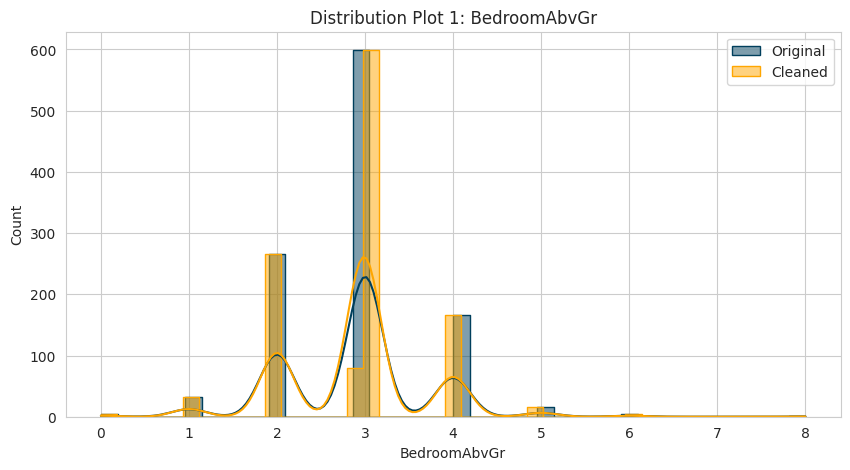

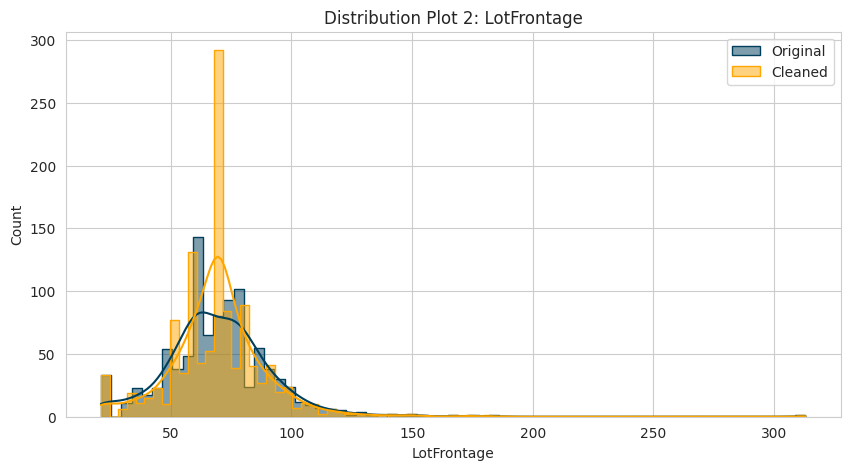

In [20]:
DataCleaningResult(df=TrainSet,
                      df_cleaned=df_method,
                      variables=variables_mean)

### Median Imputation

Add the median for ['2ndFlrSF','BsmtFinType1','GarageFinish','GarageYrBlt','MasVnrArea']

In [21]:
from feature_engine.imputation import MeanMedianImputer
variables_median = ['2ndFlrSF','GarageYrBlt','MasVnrArea']

# Set up the imputer

imputer = MeanMedianImputer(
    imputation_method='median', 
    variables=variables_median)

#Find median and imput values

imputer.fit(TrainSet)
df_method = imputer.transform(TrainSet)

In [22]:
# Corroborate that the dictionary
# contains the mean values of the variables.

TrainSet[['2ndFlrSF','GarageYrBlt','MasVnrArea']].median()

2ndFlrSF          0.0
GarageYrBlt    1979.0
MasVnrArea        0.0
dtype: float64

In [23]:
#Check for NA

df_method[['2ndFlrSF','GarageYrBlt','MasVnrArea']].isnull().sum()

2ndFlrSF       0
GarageYrBlt    0
MasVnrArea     0
dtype: int64


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['2ndFlrSF', 'GarageYrBlt', 'MasVnrArea'] 




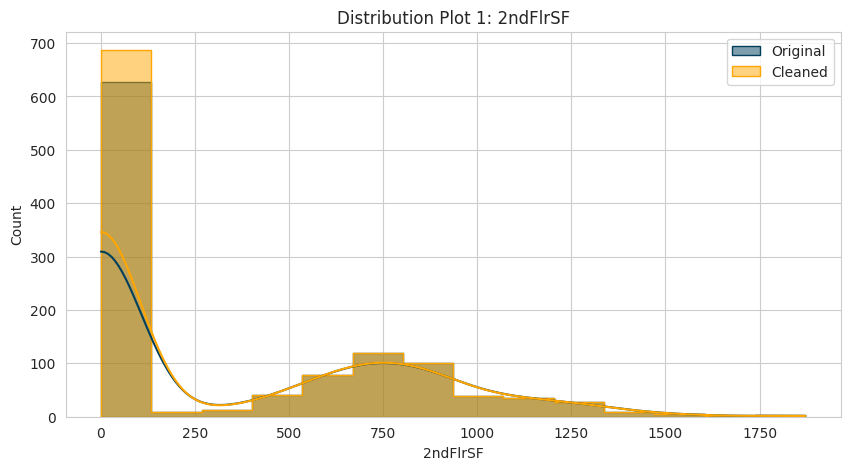

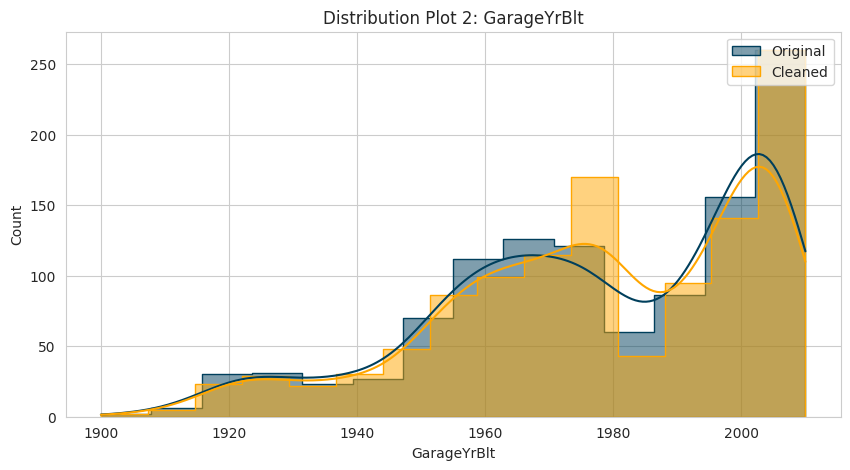

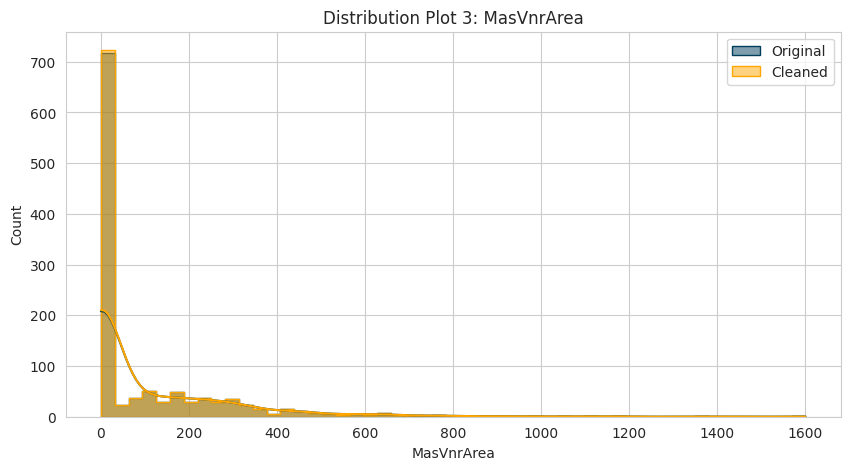

In [24]:
DataCleaningResult(df=TrainSet,
                      df_cleaned=df_method,
                      variables=variables_median)

### Categorical Imputaion

In [25]:
from feature_engine.imputation import CategoricalImputer

variables_categorical = ['GarageFinish' , 'BsmtFinType1']

# Set up the imputer

imputer = CategoricalImputer(
    imputation_method='missing',
    fill_value='None',
    variables=variables_categorical)

#Find categorical and imput values

imputer.fit(TrainSet)
df_method = imputer.transform(TrainSet)

In [26]:
#Check for NA

df_method[['GarageFinish' , 'BsmtFinType1']].isnull().sum()

GarageFinish    0
BsmtFinType1    0
dtype: int64


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['GarageFinish', 'BsmtFinType1'] 




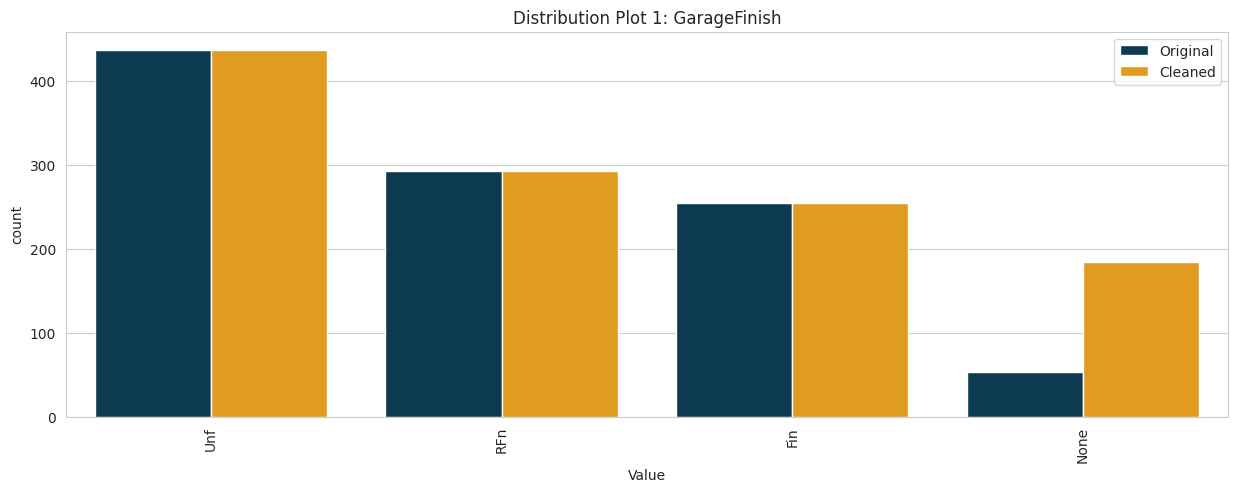

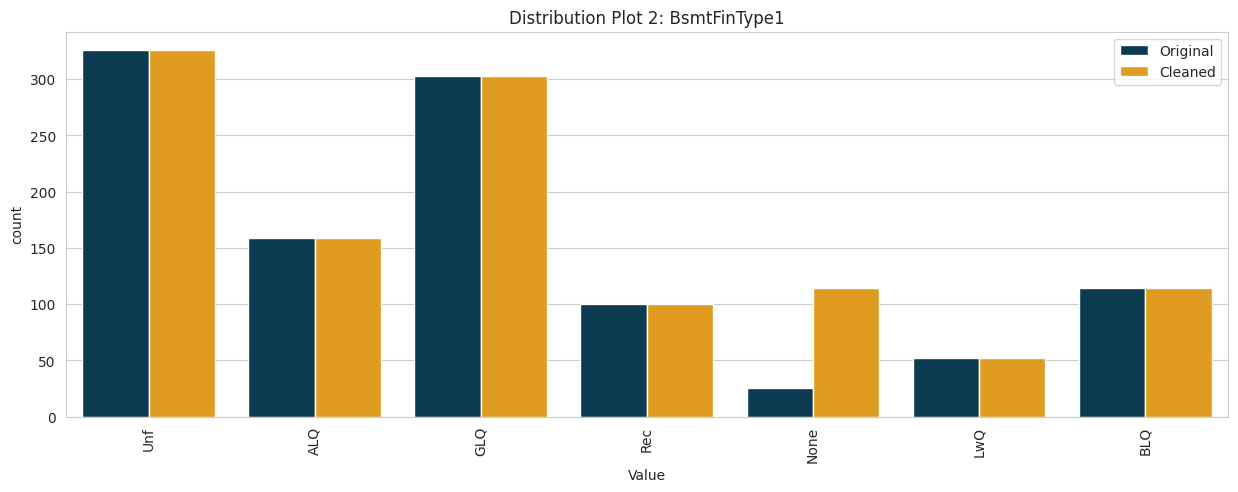

In [27]:
DataCleaningResult(df=TrainSet,
                      df_cleaned=df_method,
                      variables=variables_categorical)

### Apply transformation to the data

In [28]:
variables_to_drop = ['EnclosedPorch', 'WoodDeckSF']
imputer = DropFeatures(features_to_drop=variables_to_drop)
imputer.fit(TrainSet)
TrainSet, TestSet, df_house_price_records = imputer.transform(TrainSet) , imputer.transform(TestSet) , imputer.transform(df_house_price_records)

variables_mean = ['BedroomAbvGr' , 'LotFrontage']
imputer = MeanMedianImputer(imputation_method='mean',variables=variables_mean)
imputer.fit(TrainSet)
TrainSet, TestSet, df_house_price_records = imputer.transform(TrainSet) , imputer.transform(TestSet) , imputer.transform(df_house_price_records)

variables_median = ['2ndFlrSF','GarageYrBlt','MasVnrArea']
imputer = MeanMedianImputer(imputation_method='median',variables=variables_median)
imputer.fit(TrainSet)
TrainSet, TestSet, df_house_price_records = imputer.transform(TrainSet) , imputer.transform(TestSet) , imputer.transform(df_house_price_records)

variables_categorical = ['GarageFinish' , 'BsmtFinType1']
imputer = CategoricalImputer(imputation_method='missing',fill_value='None',variables=variables_categorical)
imputer.fit(TrainSet)
TrainSet, TestSet, df_house_price_records = imputer.transform(TrainSet) , imputer.transform(TestSet) , imputer.transform(df_house_price_records)

In [29]:
EvaluateMissingData(TrainSet)

,RowsWithMissingData,PercentageOfDataset,DataType


In [30]:
EvaluateMissingData(TestSet)

,RowsWithMissingData,PercentageOfDataset,DataType


In [31]:
EvaluateMissingData(df_house_price_records)

,RowsWithMissingData,PercentageOfDataset,DataType


---

# Push files to Repo

In [32]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') # create outputs/datasets/collection folder
except Exception as e:
  print(e)


# Train Set

In [33]:
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

# Test Set

In [34]:
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)

# Cleaned Dataset

In [35]:
df_house_price_records.to_csv("outputs/datasets/cleaned/HousePricesRecordsCleaned.csv", index=False)